<a href="https://colab.research.google.com/github/VerlonRoelMBINGUI/AMMI_foundation_Deep-learning/blob/main/Verlon_Roel_MBINGUI_Pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## what is Pytorch

![picture](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/pytorch.png)

PyTorch is a Python-based library used to build neural networks.

It provides classes that allow us to easily develop a suite of deep learning models.

It gives maximum flexibility and speed.

## Install pytorch

In [1]:
# !conda install pytorch torchvision -c pytorch
# # or with GPU
# ! conda install pytorch torchvision cudatoolkit=10.1 -c pytorch

#https://pytorch.org/

###Let's import pytorch and check that it's well installed

In [2]:
import torch
print(torch.__version__)

2.0.0+cu118


## Autograd

### PyTorch uses a technique called automatic differentiation. It records all the operations that we are performing (computational graph) and replays it backward to compute gradients
### The autograd package provides automatic differentiation for all operations on Tensors

In [3]:
# requires_grad = True -> tracks all operations on the tensor. 
torch.manual_seed(42)
w = torch.randn(3, requires_grad=True)
print(w)
y = w + 2
# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(y)
y.retain_grad()

tensor([0.3367, 0.1288, 0.2345], requires_grad=True)
tensor([2.3367, 2.1288, 2.2345], grad_fn=<AddBackward0>)


In [4]:
print(y.grad_fn)

In [5]:
z = y * y * 3
print(z)
h = z.mean()
print(h)

tensor([16.3804, 13.5955, 14.9785], grad_fn=<MulBackward0>)
tensor(14.9848, grad_fn=<MeanBackward0>)


In [6]:
z.retain_grad()

Let's compute the gradients with backpropagation
When we finish our computation we can call ***.backward()*** and have all the gradients computed automatically.
The gradient for this tensor will be accumulated into .grad attribute.
It is the partial derivate of the function w.r.t. the tensor.

In summary, torch.autograd is an engine for computing vector-Jacobian product
It computes partial derivates while applying the chain rule

In [7]:
h.backward()
#print(w.grad) # dh/dx

## let's compute the gradient manually

$δh/δw  = (δh/δz).(δz/δy).(δy/δw)$

$δh/δz = 1/3$

$δz/δy = 6y$

$δy/δx = 1$

$δh/δx = 1/3 * 6y * 1  = 2(w + 2)$

In [8]:
2*(w + 2)

tensor([4.6734, 4.2576, 4.4689], grad_fn=<MulBackward0>)

### grad w.r.t a non leaf tensor

In [9]:
print(y.grad)

tensor([4.6734, 4.2576, 4.4689])


## Zeros gradient

backward() accumulates the gradient for this tensor into .grad attribute. We need to be careful during optimization !!! Use .zero_() to empty the gradients before a new optimization step so that the parameter will be updated correctly. Otherwise, the gradient would be a combination of the old gradient, which we have already used to update our model parameters, and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum 

In [10]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)

# print(weights)
# print(model_output)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [11]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)
  
    # this is important! It affects the final weights & output
    weights.grad.zero_()

# print(weights)
# print(model_output)

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [12]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x

loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)


# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

## Pytorch optim module

The Optim module in PyTorch has pre-written codes for most of the optimizers that are used while building a neural network. We just have to import them and then they can be used to build models.

In [13]:
# importing the optim module
from torch import optim
# sgd
## SGD = optim.SGD(model.parameters(), lr=learning_rate)

# adam
## adam = optim.Adam(model.parameters(), lr=learning_rate)

# Optimizer has zero_grad() method
# During training:
# optimizer.step()
# optimizer.zero_grad()

## Torch nn Module

It provides an easy and modular way to build and train simple or complex neural networks using Torch:




*   Simple layers: nn.Linear
*   Convolutional layers: nn.Conv1D, nn.Conv2D, ...
*   Pooling layers: nn.MaxPool1d, nn.MaxPool2d, ....
*   Criterion: nn.MSELoss, nn.CrossEntropyLoss
*   Activation functions:  nn.ReLU, nn.Sigmoid, ...
nn.RNN, nn.LSTM
*   ....








In [14]:
import torch.nn as nn


## Linear regression with pytorch

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

### Prepare data

In [16]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [17]:
print(n_samples, n_features)

100 1


### Model

In [18]:
#Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [19]:
model

Linear(in_features=1, out_features=1, bias=True)

In [20]:
for name, w in model.named_parameters():
  print(name)
  print(w)


weight
Parameter containing:
tensor([[0.8815]], requires_grad=True)
bias
Parameter containing:
tensor([-0.7336], requires_grad=True)


## Loss and optimizer

In [21]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

## Training

epoch: 10, loss = 3972.3162


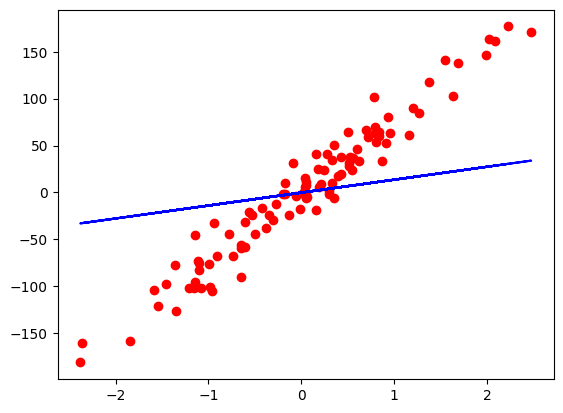

In [22]:
num_epochs = 10
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)

    ##compute the loss between your prediction and the true y
    loss = criterion(y_predicted, y)
    
    # Backward pass 
    loss.backward()

    ## update parameters
    optimizer.step()
    

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## Pytorch Dataset

PyTorch provides two data primitives: `torch.utils.data.DataLoade`r and `torch.utils.data.Dataset` that allow us to use pre-loaded datasets as well as our own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. 

Dataset are accessible through  
* TorchVision: for images dataset
* TorchText: for text datasets
* TorchAudio: for audios dataset


Here is an example of how to load the Fashion-MNIST

`root` is the path where the train/test data is stored,

`train` specifies training or test dataset,

`download=True` downloads the data from the internet if it’s not available at root.

`transform` and target_transform specify the feature and label transformations (convert data to tensor, normalize data, ...(see documentation))




In [23]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()  
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14980818.25it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270437.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5118359.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17540436.22it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [24]:
len(training_data)

60000

In [25]:
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=False)
for image, label in train_dataloader:
  print(image.shape)
  print(label)
  break

torch.Size([16, 1, 28, 28])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [26]:
len(train_dataloader)

3750

## Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. 

In [27]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [28]:
from torch.utils.data import Dataset
import pandas as pd

class WineDataset(Dataset):
    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = pd.read_csv('/content/drive/MyDrive/wine.csv')
        
        xy = xy.to_numpy()
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [29]:
# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

print(features.shape)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) tensor([1.], dtype=torch.float64)
torch.Size([13])


## Using pytorch dataset transform on custom dataset

In [30]:
class WineDataset1(Dataset):

    def __init__(self, transform=None):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = pd.read_csv('/content/drive/MyDrive/wine.csv')
        
        xy = xy.to_numpy()
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = xy[:, 1:] # size [n_samples, n_features]
        self.y_data = xy[:, [0]] # size [n_samples, 1]
        self.transform = transform

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        sample =  self.x_data[index], self.y_data[index]
        if self.transform:
          sample = self.transform(sample)
        return sample

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, target = sample
    return torch.from_numpy(inputs), torch.from_numpy(target)


In [31]:
# create dataset
dataset1 = WineDataset1(transform=ToTensor())

# get first sample and unpack
first_data = dataset1[0]
features, labels = first_data
print(features, labels)

print(features.shape)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) tensor([1.], dtype=torch.float64)
torch.Size([13])


## Create a Dataloader for our custum dataset

In [32]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
train_loader = DataLoader(dataset=dataset1,
                          batch_size=4,
                          shuffle=True)

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
features, labels = data
print(features, labels)
print(features.shape)

tensor([[1.4160e+01, 2.5100e+00, 2.4800e+00, 2.0000e+01, 9.1000e+01, 1.6800e+00,
         7.0000e-01, 4.4000e-01, 1.2400e+00, 9.7000e+00, 6.2000e-01, 1.7100e+00,
         6.6000e+02],
        [1.4390e+01, 1.8700e+00, 2.4500e+00, 1.4600e+01, 9.6000e+01, 2.5000e+00,
         2.5200e+00, 3.0000e-01, 1.9800e+00, 5.2500e+00, 1.0200e+00, 3.5800e+00,
         1.2900e+03],
        [1.4830e+01, 1.6400e+00, 2.1700e+00, 1.4000e+01, 9.7000e+01, 2.8000e+00,
         2.9800e+00, 2.9000e-01, 1.9800e+00, 5.2000e+00, 1.0800e+00, 2.8500e+00,
         1.0450e+03],
        [1.2160e+01, 1.6100e+00, 2.3100e+00, 2.2800e+01, 9.0000e+01, 1.7800e+00,
         1.6900e+00, 4.3000e-01, 1.5600e+00, 2.4500e+00, 1.3300e+00, 2.2600e+00,
         4.9500e+02]], dtype=torch.float64) tensor([[3.],
        [1.],
        [1.],
        [2.]], dtype=torch.float64)
torch.Size([4, 13])


## Let's see how to train with the dataloader

In [33]:
# Dummy Training loop
num_epochs = 2
n_iterations = 10
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

Epoch: 1/2, Step 5/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/10| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/10| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/10| Inputs torch.Size([4, 13]) | L

## Activation functions

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

## Sigmoid

In [35]:
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])


## Tanh

In [36]:
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])


## Relu

In [37]:
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])


## leaky relu

In [38]:

output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


#softmax

In [39]:
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])


## Feedforward network

In [40]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')




## Load MNIST dataset from torchvision


In [41]:
# MNIST dataset 
batch_size = 16
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)
print(example_data.shape)
print(example_targets)

100%|██████████| 9912422/9912422 [00:00<00:00, 101628500.09it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31471991.12it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25168922.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14710833.03it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([16, 1, 28, 28])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5])


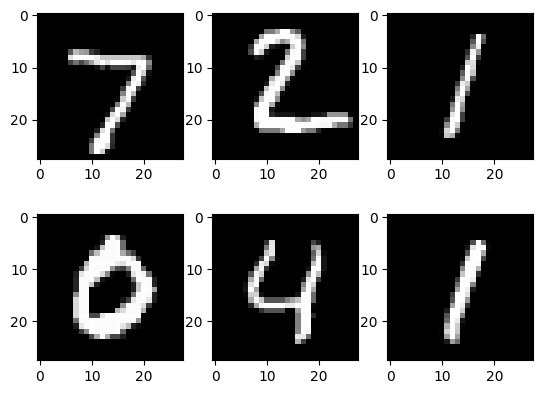

In [42]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

## Define the Model using torch nn Module

In [43]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        ## add a linear layer
        self.l1 = nn.Linear(self.input_size,self.hidden_size )

        ## add relu activation
        self.relu = nn.ReLU()

        ## add linear layer
        self.l2 = nn.Linear(self.hidden_size ,self.num_classes)
    
    def forward(self, x):
        ## fit the data x to the first layer
        out = self.l1(x)

        ## apply non linearity to the output of the first layer
        out = self.relu(out)

        ## pass the output to the last layer
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

## Set hyper-parameters

In [44]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 16
learning_rate = 0.001

In [45]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## Train model

In [46]:
for epoch in range(num_epochs):
#   if os.path.exists("model_weights.pth"):
    # model.load_state_dict(torch.load('model_weights.pth'))
  for i, (images, labels) in enumerate(train_loader):  
      # origin shape: [16, 1, 28, 28]
      # resized: [16, 784]
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      
      # Forward pass
      outputs = model(images)

      ## compute the loss between output and labels
      loss = criterion(outputs, labels)
      
      # Backward pass
      loss.backward()
    

      ## update parameters
      optimizer.step()
      

      ## zeros the gradient
      optimizer.zero_grad()
      
      if (i+1) % 100 == 0:
          print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  

Epoch [1/2], Loss: 0.5345
Epoch [1/2], Loss: 0.2177
Epoch [1/2], Loss: 0.0851
Epoch [1/2], Loss: 0.1398
Epoch [1/2], Loss: 0.2222
Epoch [1/2], Loss: 0.1905
Epoch [1/2], Loss: 0.2100
Epoch [1/2], Loss: 0.3135
Epoch [1/2], Loss: 0.0910
Epoch [1/2], Loss: 0.2005
Epoch [1/2], Loss: 0.0334
Epoch [1/2], Loss: 0.0557
Epoch [1/2], Loss: 0.0075
Epoch [1/2], Loss: 0.1065
Epoch [1/2], Loss: 0.2470
Epoch [1/2], Loss: 0.1921
Epoch [1/2], Loss: 0.1159
Epoch [1/2], Loss: 0.0907
Epoch [1/2], Loss: 0.0568
Epoch [1/2], Loss: 0.1031
Epoch [1/2], Loss: 0.3850
Epoch [1/2], Loss: 0.0888
Epoch [1/2], Loss: 0.1280
Epoch [1/2], Loss: 0.0349
Epoch [1/2], Loss: 0.0200
Epoch [1/2], Loss: 0.0956
Epoch [1/2], Loss: 0.7068
Epoch [1/2], Loss: 0.0020
Epoch [1/2], Loss: 0.1557
Epoch [1/2], Loss: 0.1113
Epoch [1/2], Loss: 0.0928
Epoch [1/2], Loss: 0.0161
Epoch [1/2], Loss: 0.0536
Epoch [1/2], Loss: 0.1266
Epoch [1/2], Loss: 0.1896
Epoch [1/2], Loss: 0.0472
Epoch [1/2], Loss: 0.4489
Epoch [2/2], Loss: 0.0639
Epoch [2/2],

## Test the model

In [47]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.64 %


## Saving and loading models

In [48]:
torch.save(model.state_dict(), 'model_weights.pth')

In [49]:
model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

## Extra reading

https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html

https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html